In [47]:
#importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import random

In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [49]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
 
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 8, 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(8, 32, 3, stride = 2, padding = 1), #14
            nn.ReLU(),
            nn.Conv2d(32, 64 , 3, stride = 2, padding = 1), #7
            nn.ReLU(),
            nn.Conv2d(64, 128, 7),  #1 x 128
            nn.ReLU(),
            nn.Flatten()            
        )
        
        self.FC1 = nn.Linear(128,16) # 16x1
        self.FC2 = nn.Linear(128,16)

            
        self.decoder = nn.Sequential(   
            nn.Linear(16,128),
            nn.ReLU(),
            nn.Unflatten(1,(-1,1,1)),
            nn.ConvTranspose2d(128, 64, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 3, stride = 2, padding = 1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 8, 3, stride = 2, padding = 1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 1, 3, stride = 1, padding = 1),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, log_var):
        #log_var: log variance from the encoder's latent space
        
        std = torch.exp(0.5*log_var) # standard deviation
        eps = torch.distributions.Normal(0, 1).sample(std.shape).to(device)

        sample = mu + eps*std# sampling as if coming from the input space

        return sample, std
    
    def forward(self, x):

        x = self.encoder(x)

        mean = self.FC1(x)
        log_var = self.FC2(x)
        
        sample, std = self.reparameterize(mean, log_var)
        output = self.decoder(sample)
        
        return output, mean, std

In [83]:
model=VAE().to(device)

batch_size = 64
num_epochs = 10
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

In [84]:
train_dataset=datasets.FashionMNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=datasets.FashionMNIST(root='./data',train=False,transform=transforms.ToTensor(),download=True)

train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=True)

In [85]:
def final_loss(x, x_recon, mu, log_std):
    BCE = criterion(x, x_recon)
    KLD = -0.5 * torch.mean(1 + log_std - torch.square(mu) - torch.exp(log_std))

    return BCE + KLD

Epoch [1/10], Step [1/938], Loss: 0.5094
Epoch [1/10], Step [101/938], Loss: 0.0927
Epoch [1/10], Step [201/938], Loss: 0.0514
Epoch [1/10], Step [301/938], Loss: 0.0439
Epoch [1/10], Step [401/938], Loss: 0.0350
Epoch [1/10], Step [501/938], Loss: 0.0290
Epoch [1/10], Step [601/938], Loss: 0.0281
Epoch [1/10], Step [701/938], Loss: 0.0246
Epoch [1/10], Step [801/938], Loss: 0.0274
Epoch [1/10], Step [901/938], Loss: 0.0266
Epoch = 1


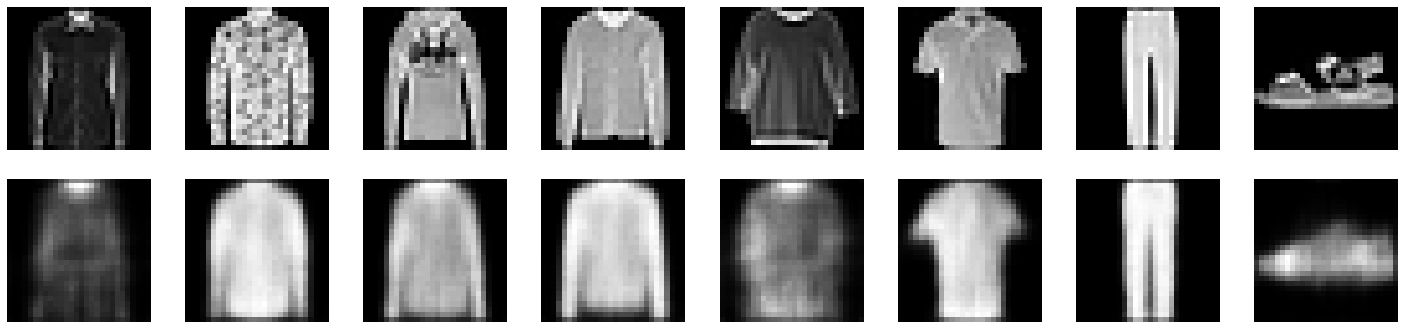

Epoch [2/10], Step [1/938], Loss: 0.0241
Epoch [2/10], Step [101/938], Loss: 0.0242
Epoch [2/10], Step [201/938], Loss: 0.0215
Epoch [2/10], Step [301/938], Loss: 0.0242
Epoch [2/10], Step [401/938], Loss: 0.0209
Epoch [2/10], Step [501/938], Loss: 0.0202
Epoch [2/10], Step [601/938], Loss: 0.0198
Epoch [2/10], Step [701/938], Loss: 0.0194
Epoch [2/10], Step [801/938], Loss: 0.0182
Epoch [2/10], Step [901/938], Loss: 0.0194
Epoch = 2


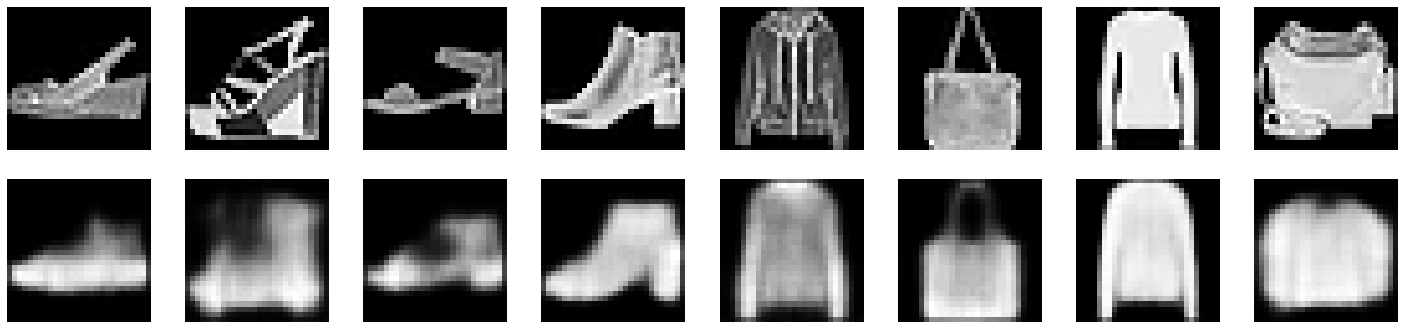

Epoch [3/10], Step [1/938], Loss: 0.0200
Epoch [3/10], Step [101/938], Loss: 0.0195
Epoch [3/10], Step [201/938], Loss: 0.0211
Epoch [3/10], Step [301/938], Loss: 0.0178
Epoch [3/10], Step [401/938], Loss: 0.0180
Epoch [3/10], Step [501/938], Loss: 0.0160
Epoch [3/10], Step [601/938], Loss: 0.0169
Epoch [3/10], Step [701/938], Loss: 0.0150
Epoch [3/10], Step [801/938], Loss: 0.0156
Epoch [3/10], Step [901/938], Loss: 0.0174
Epoch = 3


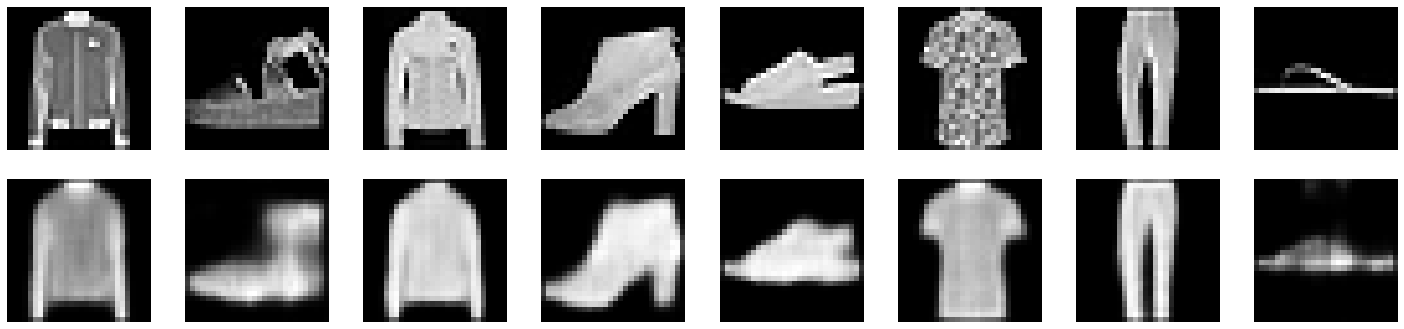

Epoch [4/10], Step [1/938], Loss: 0.0166
Epoch [4/10], Step [101/938], Loss: 0.0174
Epoch [4/10], Step [201/938], Loss: 0.0161
Epoch [4/10], Step [301/938], Loss: 0.0193
Epoch [4/10], Step [401/938], Loss: 0.0151
Epoch [4/10], Step [501/938], Loss: 0.0144
Epoch [4/10], Step [601/938], Loss: 0.0144
Epoch [4/10], Step [701/938], Loss: 0.0159
Epoch [4/10], Step [801/938], Loss: 0.0159
Epoch [4/10], Step [901/938], Loss: 0.0146
Epoch = 4


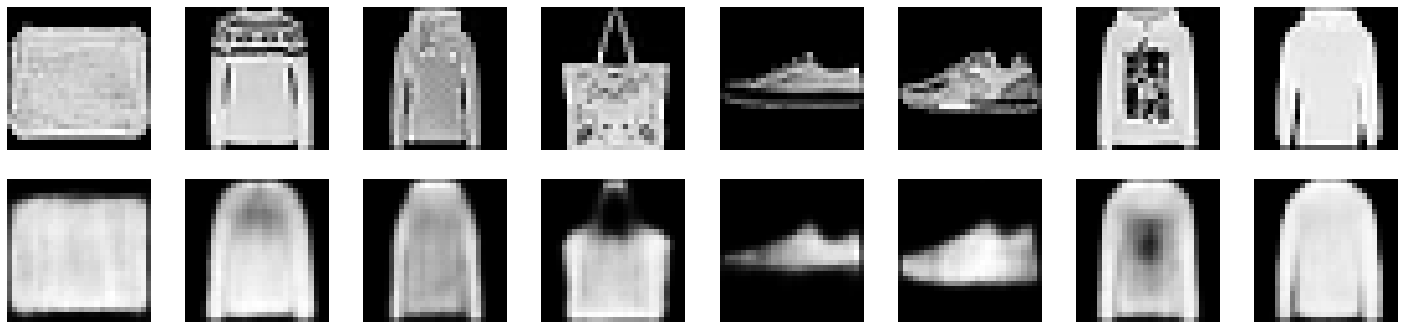

Epoch [5/10], Step [1/938], Loss: 0.0157
Epoch [5/10], Step [101/938], Loss: 0.0150
Epoch [5/10], Step [201/938], Loss: 0.0146
Epoch [5/10], Step [301/938], Loss: 0.0157
Epoch [5/10], Step [401/938], Loss: 0.0147
Epoch [5/10], Step [501/938], Loss: 0.0136
Epoch [5/10], Step [601/938], Loss: 0.0145
Epoch [5/10], Step [701/938], Loss: 0.0138
Epoch [5/10], Step [801/938], Loss: 0.0153
Epoch [5/10], Step [901/938], Loss: 0.0134
Epoch = 5


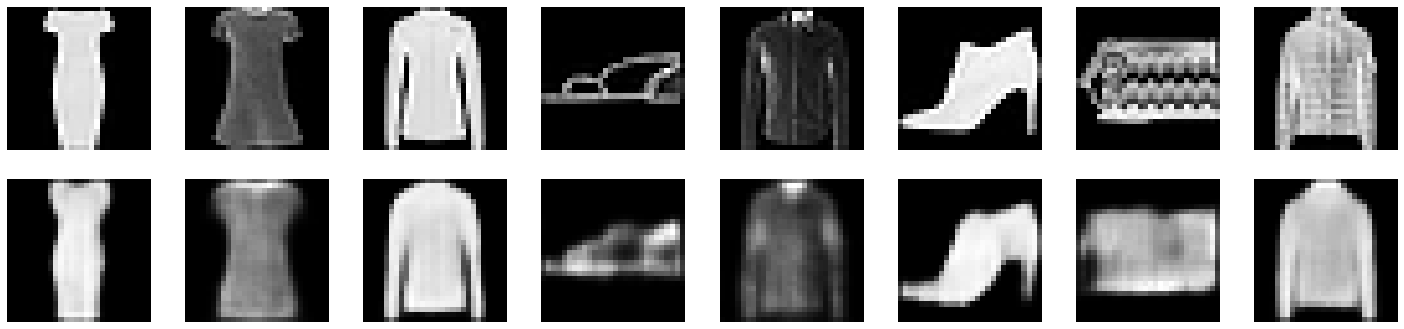

Epoch [6/10], Step [1/938], Loss: 0.0137
Epoch [6/10], Step [101/938], Loss: 0.0159
Epoch [6/10], Step [201/938], Loss: 0.0136
Epoch [6/10], Step [301/938], Loss: 0.0144
Epoch [6/10], Step [401/938], Loss: 0.0145
Epoch [6/10], Step [501/938], Loss: 0.0139
Epoch [6/10], Step [601/938], Loss: 0.0128
Epoch [6/10], Step [701/938], Loss: 0.0144
Epoch [6/10], Step [801/938], Loss: 0.0118
Epoch [6/10], Step [901/938], Loss: 0.0144
Epoch = 6


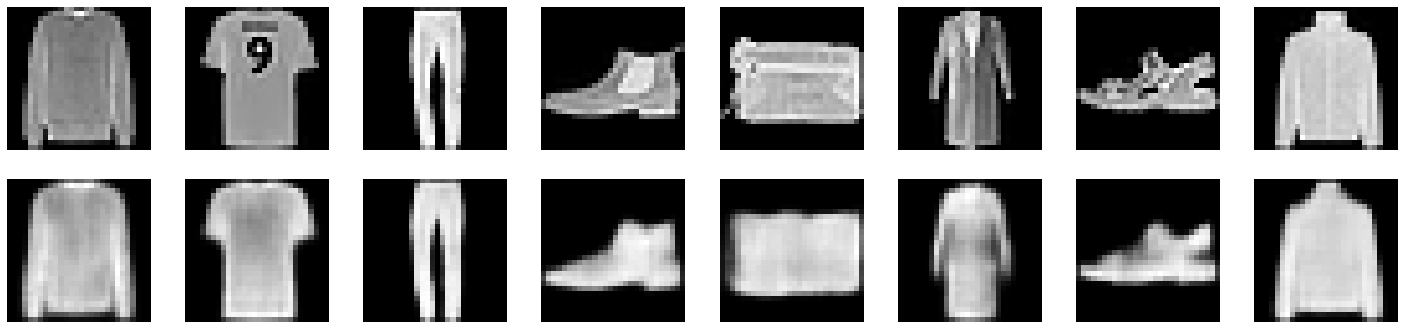

Epoch [7/10], Step [1/938], Loss: 0.0127
Epoch [7/10], Step [101/938], Loss: 0.0117
Epoch [7/10], Step [201/938], Loss: 0.0128
Epoch [7/10], Step [301/938], Loss: 0.0139
Epoch [7/10], Step [401/938], Loss: 0.0124
Epoch [7/10], Step [501/938], Loss: 0.0142
Epoch [7/10], Step [601/938], Loss: 0.0115
Epoch [7/10], Step [701/938], Loss: 0.0124
Epoch [7/10], Step [801/938], Loss: 0.0126
Epoch [7/10], Step [901/938], Loss: 0.0139
Epoch = 7


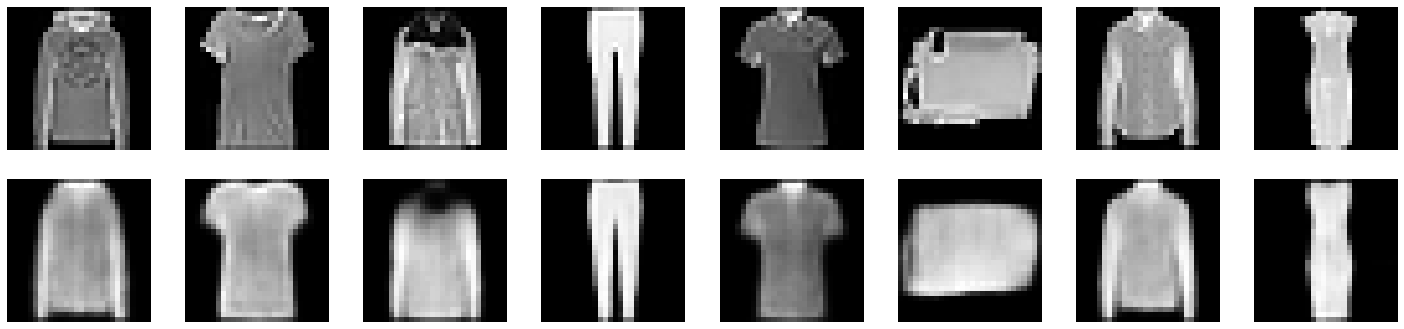

Epoch [8/10], Step [1/938], Loss: 0.0142
Epoch [8/10], Step [101/938], Loss: 0.0111
Epoch [8/10], Step [201/938], Loss: 0.0120
Epoch [8/10], Step [301/938], Loss: 0.0118
Epoch [8/10], Step [401/938], Loss: 0.0102
Epoch [8/10], Step [501/938], Loss: 0.0125
Epoch [8/10], Step [601/938], Loss: 0.0121
Epoch [8/10], Step [701/938], Loss: 0.0123
Epoch [8/10], Step [801/938], Loss: 0.0153
Epoch [8/10], Step [901/938], Loss: 0.0122
Epoch = 8


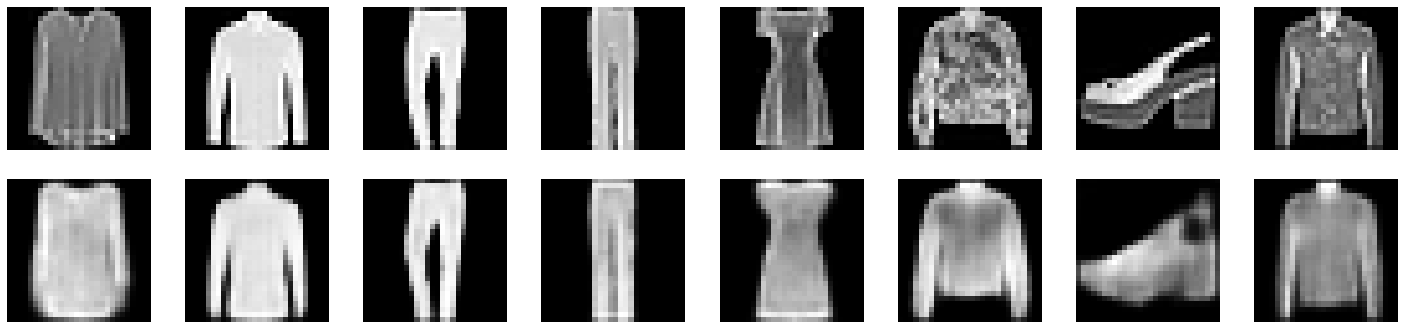

Epoch [9/10], Step [1/938], Loss: 0.0139
Epoch [9/10], Step [101/938], Loss: 0.0111
Epoch [9/10], Step [201/938], Loss: 0.0114
Epoch [9/10], Step [301/938], Loss: 0.0118
Epoch [9/10], Step [401/938], Loss: 0.0113
Epoch [9/10], Step [501/938], Loss: 0.0116
Epoch [9/10], Step [601/938], Loss: 0.0115
Epoch [9/10], Step [701/938], Loss: 0.0123
Epoch [9/10], Step [801/938], Loss: 0.0122
Epoch [9/10], Step [901/938], Loss: 0.0109
Epoch = 9


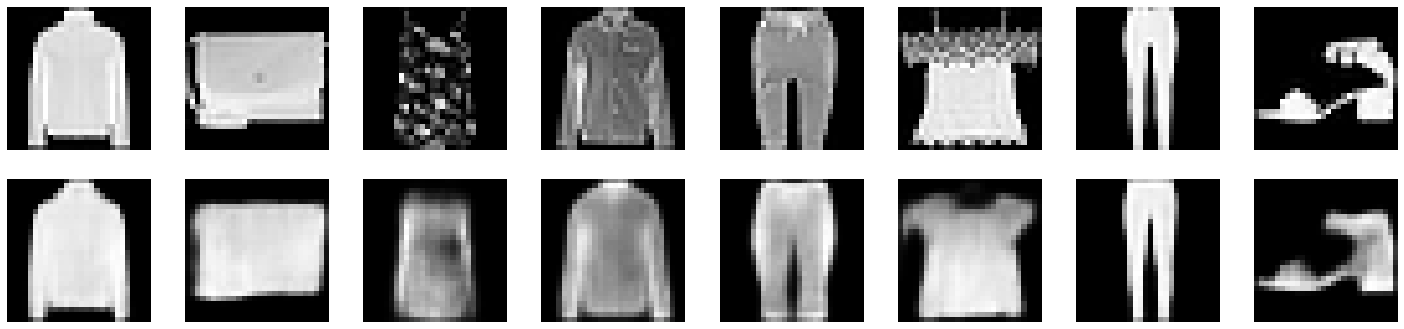

Epoch [10/10], Step [1/938], Loss: 0.0126
Epoch [10/10], Step [101/938], Loss: 0.0130
Epoch [10/10], Step [201/938], Loss: 0.0118
Epoch [10/10], Step [301/938], Loss: 0.0113
Epoch [10/10], Step [401/938], Loss: 0.0108
Epoch [10/10], Step [501/938], Loss: 0.0125
Epoch [10/10], Step [601/938], Loss: 0.0103
Epoch [10/10], Step [701/938], Loss: 0.0116
Epoch [10/10], Step [801/938], Loss: 0.0118
Epoch [10/10], Step [901/938], Loss: 0.0121
Epoch = 10


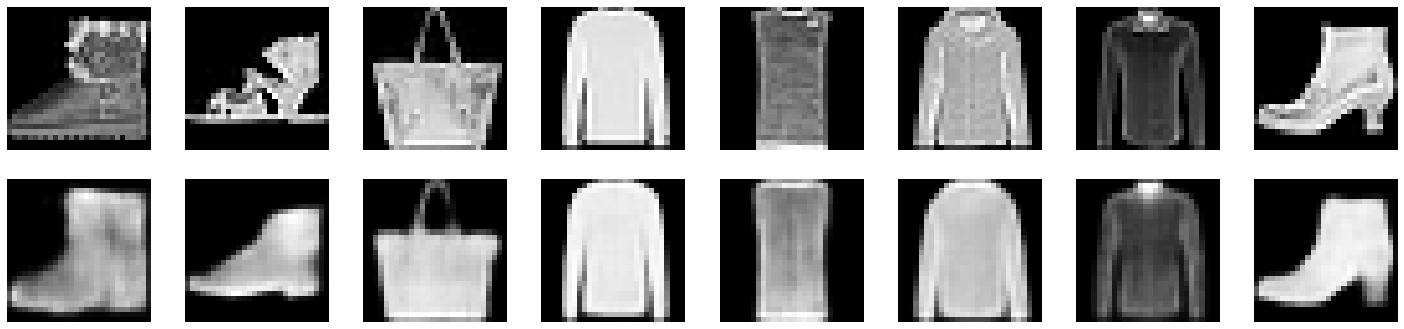

In [86]:
losses=[]
for epoch in range(num_epochs):
    for i, (x, _) in enumerate(train_loader):
        x = x.to(device)
        x_recon, mu, log_std = model.forward(x)

        loss = final_loss(x, x_recon, mu, log_std)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        if i % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))
        losses.append(loss.item())
    # Reshaping
    x = x.reshape(-1,28,28)
    x_recon = x_recon.reshape(-1,28,28)

    #To convert cuda tensor to numpy array
    x= x.detach().cpu().numpy()
    x_recon = x_recon.detach().cpu().numpy()

    plt.figure(figsize = (25,50))
    print("Epoch = {}".format(epoch+1))
    for i in range(8):
        plt.subplot(16,8,i+1)
        plt.imshow(x[i], cmap='gray')
        plt.axis('off')

        plt.subplot(16,8,i + 9)
        plt.imshow(x_recon[i], cmap='gray')
        plt.axis('off')

    plt.show()

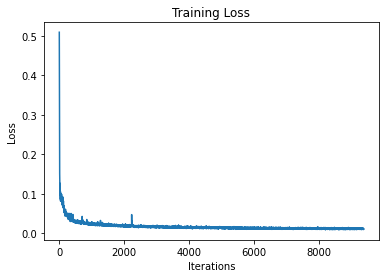

In [87]:
plt.title('Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(losses[::])
plt.show()

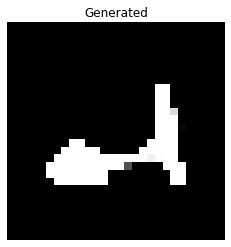

In [119]:
index= random.randint(0, len(test_dataset))

with torch.no_grad():

    data = torch.distributions.Normal(0, 1).sample((1,16)).to(device)
    #data= torch.rand((28,28)).view(1,1,28,28)

    output= model.decoder(data)
    
    data = data.detach().cpu().numpy()
    #data = data.reshape(-1, 28, 28)

    output = output.detach().cpu().numpy()
    #output = output.reshape(-1, 28, 28)

    plt.title('Generated')
    plt.imshow(output[0].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.show()